# Explorar el conjunto de datos Housing

Antes de implementar nuestro primer modelo de regresión lineal, comentaremos el conjunto de datos que utilizaremos, el conjunto Housing, que contiene información sobre casas en los suburbios de Boston recogida por D. Harrison y D.L. Rubinfield en 1978. El conjunto de datos antes era parte del repositorio de Machine Learning de UCI.

## Cargar el conjunto Housing en un maro de datos

Descripción, que anteriormente estaba disponible en: [https://archive.ics.uci.edu/ml/datasets/Housing](https://archive.ics.uci.edu/ml/datasets/Housing)

En esta sección, cargaremos el conjunto de datos Housing utilizando la función read_csv de pandas, que es rápida y versátil- una herramienta recomendada para trabajar con datos tabulados almacenados en formato de texto plano.

Las características de las 560 muestras en el conjunto de datos de Housing se encuentran resumidas a continuación, y han sido tomadas de la fuente original compartida previamente en https://archive.ics.uci.edu/ml/datasets/Housing:
- CRIM: Tasa de criminalidad per cápita por ciudad.
- ZN: Proporción de suelo residencial ocupado para terrenos de más de 2300 m2 
- INDUS: Proporción de hectáreas de negocios no minoristas por ciudad.
- CHAS: Variable ficticia de Charles River (=1 si el tramo limita el rio; si no=0).
- NOX: Concentración de óxido nítrico (partes por 10 millones).
- RM: Número medio de habitaciones por vivienda.
- AGE: Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
- DIS: Distancias ponderadas hasta cinco centros de empleo de Boston.
- RAD: Índice de accesibilidad a autopistas radiales
- TAX: Tasa de impuesto a la propiedad de valor total de 10000
- PTRATIO: Ratio de profesor por alumno por ciudad.
- B: 1000(Bk- 0.63) ^2, donde Bk es la proporción de personas [de ascendencia afroamericana] por ciudad
- LSTAT: Porcentaje de estatus inferior de la población
- MEDV: Valor medio de casas ocupadas por sus propietarios por 100

Para el resto de esta sección, tendremos en cuenta los precios de las casas (MEDV) como nuestra variable TARGET – la variable que queremos predecir mediante una o más de las 13 variables explicativas-. Antes de explorar más a fondo este conjunto de datos, vamos a copiarlo del directorio UCI a un Dataframe de pandas:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('housing.data.txt',
                 header=None,
                 sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
print('df shape:',df.shape)
df.head()

df shape: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Visualizar las características importantes de un conjunto de datos


El análisis exploratorio de datos (EDA, del inglés Exploratory Data Analysis) es un importante y recomendable primer paso antes del entrenamiento de un modelo de aprendizaje. En lo que queda de esta sección, utilizaremos algunas técnicas sencillas pero útiles del conjunto gráfico EDA que nos ayudarán a detectar de una forma más visual la presencia de Outliers, la distribución de los datos y las relaciones entre características.

Primero, crearemos una matriz de dispersión que nos permita visualizar las correlaciones por parejas entre las diferentes características en este conjunto de datos en la librería  𝑠𝑒𝑎𝑏𝑜𝑟𝑛  ( http://stanford.edu/~mwaskom/software/seaborn/ ) una librería de Python para dibujar gráficos estadísticos en  𝑀𝑎𝑡𝑝𝑙𝑜𝑡𝑙𝑖𝑏 .

Puedes instalar el paquete  𝑠𝑒𝑎𝑏𝑜𝑟𝑛  mediante  𝑐𝑜𝑛𝑑𝑎   𝑖𝑛𝑠𝑡𝑎𝑙𝑙   𝑠𝑒𝑎𝑏𝑜𝑟𝑛  o  𝑝𝑖𝑝   𝑖𝑛𝑠𝑡𝑎𝑙𝑙   𝑠𝑒𝑎𝑏𝑜𝑟𝑛 . Una vez la instalación haya finalizado, puedes importar el paquete y crear la matriz de dispersión 

Como podemos ver en la siguiente imagen, la matriz de dispersión nos proporciona un útil resumen gráfico de las relaciones existentes en el conjunto de datos:

/opt/conda/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


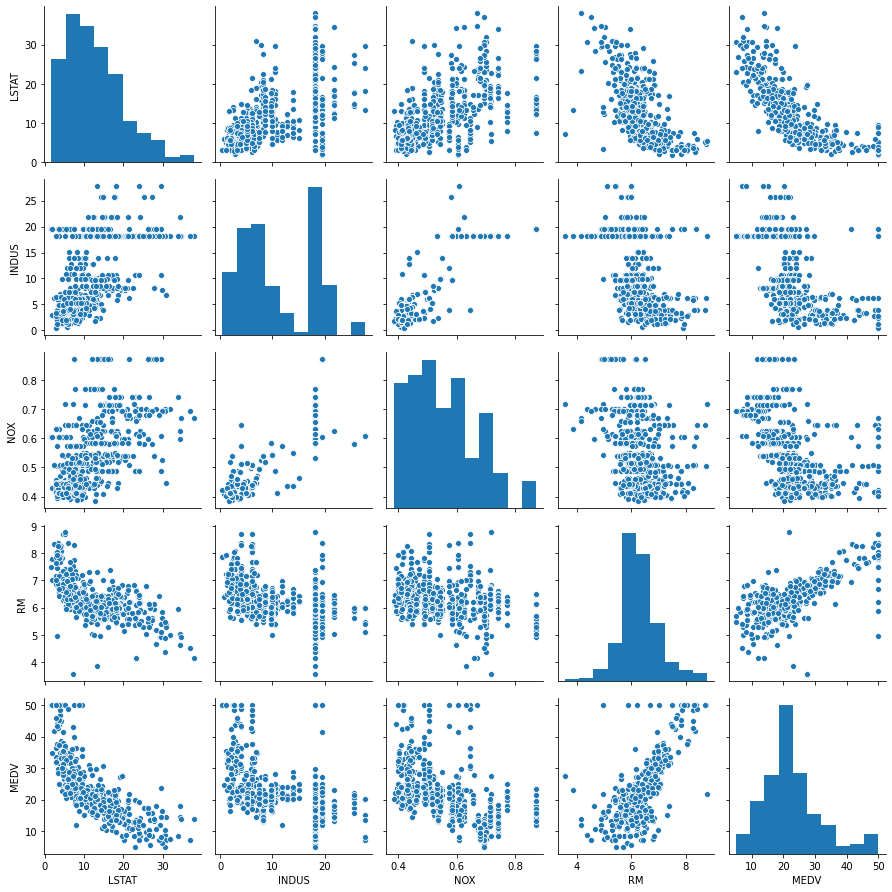

In [3]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
# plt.savefig('imagenes/10_03.png', dpi=300)
plt.show()

Con la matriz de dispersión, ahora podemos observar rápidamente cómo se distribuyen los datos y si contienen outliers. Por ejemplo, podemos ver que existe una relación lineal entre RM y los precios de las casas, MEDV (la quinta columna de la cuarta fila). Además, podemos ver en el histograma - el gráfico en la parte inferior derecha en la matriz de dispersión- que la variable MEDV parece tener una distribución normal pero contiene muchos outliers.

## Observar las relaciones mediante una matriz de correlaciones

Una matriz de correlación está estrechamente relacionada con la matriz de covarianza que vimos cuando trabajamos con análisis de componentes principales (ACP). Podemos interpretar la matriz de correlación como una versión reescalada de la matriz de covarianza.

Nota: La matriz de correlación es idéntica a la matriz de covarianza calculada a partir de las características estandarizadas.

La matriz de correlación es una matriz cuadrática que contiene coeficientes de correlación de Pearson, que mide la dependencia lineal entre pares de características. Los coeficientes de correlación se encuentran en el rango de -1 a 1. Dos características tienen una correlación positiva perfecta si r = 1, no tienen correlación si r=0 y tienen una correlación negativa perfecta si r = -1.

Como podemos ver en la imagen resultante, la matriz de correlación nos proporciona otro útil gráfico que puede ayudarnos a seleccionar características basadas en sus respectivas correlaciones lineales:

In [12]:
corr_matrix = np.corrcoef(df[cols].values.T)
print('corr_matrix Shape:', corr_matrix.shape)
corr_matrix

corr_matrix Shape: (5, 5)


array([[ 1.        ,  0.60379972,  0.59087892, -0.61380827, -0.73766273],
       [ 0.60379972,  1.        ,  0.76365145, -0.39167585, -0.48372516],
       [ 0.59087892,  0.76365145,  1.        , -0.30218819, -0.42732077],
       [-0.61380827, -0.39167585, -0.30218819,  1.        ,  0.69535995],
       [-0.73766273, -0.48372516, -0.42732077,  0.69535995,  1.        ]])

In [10]:
#Se encuentra la correlación por pares de todas las columnas en el DataFrame
#cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
df.corr()['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

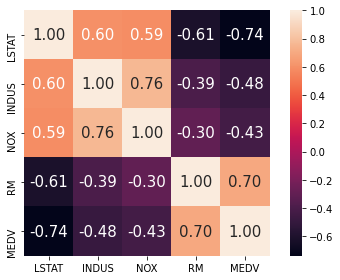

In [6]:
cm = np.corrcoef(df[cols].values.T)
#sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
#plt.savefig('imagenes/10_04.png', dpi=300)
plt.show()

Para preparar un modelo de regresión lineal, nos interesan aquellas características que tienen una alta correlación con nuestra variable TARGET que en nuestra aplicación es MEDV. si observamos se puede apreciar que nuestra variable TARGET muestra la correlación más grande con la variable LSTAT (-0.74); sin embargo, como se podía apreciar en la matriz de dispersión, existe una evidente relación no lineal entre LSTAT y MEDV. Por otro lado, la correlación entre RM y MEDV también es relativamente alta (0.70). Dada la relación lineal entre estas dos variables que hemos observado en el gráfico de dispersión, RM parace ser una buena elección para que una variable exploratoria introduzca los conceptos de un modelo de regresión lineal.

## Implementar un modelo regresión lineal de mínimos cuadrados ordinarios

Al inicio mencionamos que la regresión lineal se puede entender como la obtención de la recta de mejor ajuste a través de los puntos de muestra de nuestros datos de entrenamiento. Sin embargo, no se definio el término mejor ajuste. El método que utilizado es el de los mínimos cuadrados ordinarios (OLS), que estima los parámetros de la linea de regresión lineal que minimiza la suma de las distancias verticales cuadradas (residuos o errores) en los puntos de muestra.

## Estimar el coeficiente de un modelo de regresión con scikit-learn

En la sección anterior se implementó un modelo de regresión, en una aplicación real nos interesaría una aplicación más eficaz. Por ejemplo, muchos estimadores de scikit-learn para regresión utilizan la librería LIBLINEAR, algoritmos de optimización avanzada y otras optimizaciones de código que funcionan mejor con variables sin estandarizar, que a veces son mejores para determinadas aplicaciones.

In [14]:
from sklearn.linear_model import LinearRegression

In [16]:
X = df[['RM']].values
print('X shape:',X.shape)
X

X shape: (506, 1)


array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [17]:
y = df['MEDV'].values
print('y shape:', y.shape)
y

y shape: (506,)


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [18]:
slr = LinearRegression()
slr.fit(X, y)

LinearRegression()

In [19]:
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0]) #coeficiente
print('Intercept: %.3f' % slr.intercept_) #intercepto

Slope: 9.102
Intercept: -34.671


In [20]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)
    return

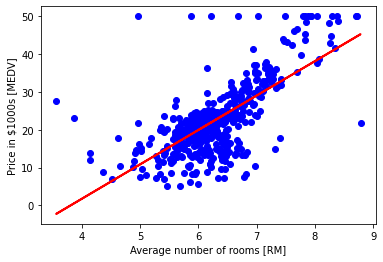

In [21]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')

#plt.savefig('images/10_07.png', dpi=300)
plt.show()

**Ecuación normal** alternativa:

In [22]:
# agregando un vector de columna de "unos"
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))

print('Slope: %.3f' % w[1])
print('Intercept: %.3f' % w[0])

Slope: 9.102
Intercept: -34.671


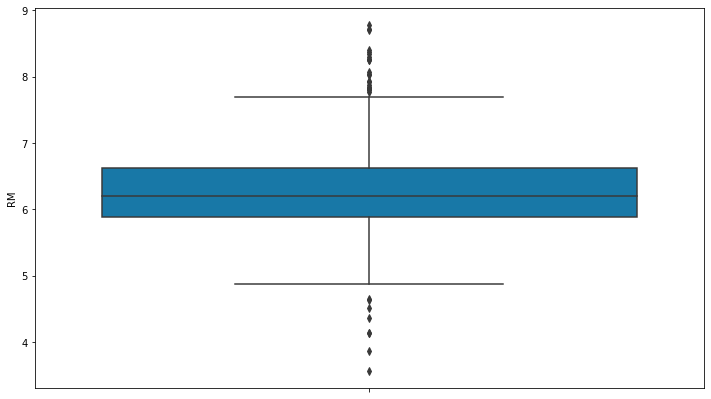

In [26]:
plt.figure(figsize=(12, 7))
sns.boxplot(y='RM',data=df,palette='winter')

# Ajustar un modelo de regresión robusto con RANSAC

Los modelos de regresión lineal pueden sufrir un gran impacto debido a la **presencia de Outliers**. En determinadas situaciones, un subconjunto muy pequeño de nuestros datos puede tener un gran efecto sobre los coeficientes del modelo estimado.

Existen muchas pruebas estadísticas que pueden utilizarse para detectar Outliers, las cuales están fuera del objetivo de esta sección. Sin embargo, la eliminación de Outliers siempre requiere nuestro propio juicio como científicos de datos, así como nuestro conocimiento del dominio.

Como alternativa a descartar los Outliers, vamos a ver un método robusto de regresión mediante el algoritmo **RANdom SAmple Consensus (RANSAC)**, que ajusta un modelo de regresión a un subconjunto de datos, los denominados **inliers**.

Podemos resumir el algoritmo iterativo RANSAC del siguiente modo:
1.	Selecciona un número aleatorio de muestras para ser inliers y ajusta el modelo.
2.	Prueba todos los otros puntos de datos frente al modelo ajustado y añade aquellos puntos que caen dentro de una tolerancia proporcionada por el usuario a los inliers.
3.	Vuelve a ajustar el modelo utilizando todos los inliers.
4.	Estima el error del modelo ajustado frente a los inliers.
5.	Finaliza el algoritmo si el rendimiento encuentra un determinado umbral definido por el usuario o si se ha llegado a un número fijo de iteraciones; si no, vuelve al paso 1.

Ahora vamos a introducir nuestro modelo lineal en el algoritmo **RANSAC** mediante la clase $RANSACRegressor$ de $scikit-learn$:

In [27]:
from sklearn.linear_model import RANSACRegressor

In [28]:
ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, #Número máximo de iteraciones para la selección aleatoria de muestras.
                         min_samples=50, #Número mínimo de muestras elegidas al azar de los datos originales.
                         loss='absolute_loss', # se admiten entradas de pérdida absoluta
                         residual_threshold=5.0, #Residuo máximo para que una muestra de datos se clasifique como inlier.
                         random_state=0) #semilla


ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(), min_samples=50,
                random_state=0, residual_threshold=5.0)

Establecemos el número máximo de iteraciones del RANSACregressor en 100 y mediante min_samples= 50, establecemos el número mínimo de las muestras elegidas aleatoriamente como mínimo en 50. Con ¨absolute_loss¨ como un argumento para el parámetro residual_metric, el algoritmo calcula las distancias verticales absolutas entre la línea ajustada y los puntos de muestra. Estableciendo el parámetro residual_threshold en 5.0 , solo hemos permitido que las muestras estén incluidas en el conjunto de inliers si su distancia vertical hasta la línea ajustada está dentro de las 5 unidades de distancia, que funcionan bien en este conjunto de datos en concreto.

Por defecto, scikit-learn utiliza la estimación MAD para seleciionar el umbral del inlier, donde MAD significa la Median Absolute Deviation o desviación absoluta media de los valores de nuestra variable TARGET y. Sin Embargo, la elección de un valor apropiado para el umbral del inlier es un problema específico, siendo esto un inconveniente del RANSAC. En los últimos años, se han desarrollado muchos métodos distintos para seleccionar automáticamente un buen umbral de inlier. Puedes encontrar una descripción detallada en: Automatic Estimation of the Inlier Threhold in Robust Múltiple Structures Fitting [ Estimación automática del umbral inlier en el ajuste robusto de estructuras múltiples], R. Toldo, A. Fussiello’s, Springer,2009 (en Image Analysis and Processing-ICIAP 2009, páginas:123-131).

Una vez ajustado el modelo RANSAC, vamos a obtener los inliers y los Outliers a partir del modelo de regresión lineal de RANSAC ajustado y vamos a representarlos juntos con el ajuste lineal:

Como podemos ver en el siguiente diagrama de dispersión, el modelo de regresión lineal ha sido ajustado en el conjunto detectado de inliers, mostrados como círculos:

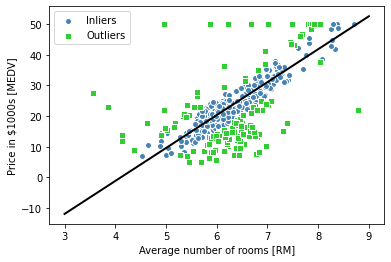

In [29]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)   
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')

#plt.savefig('images/10_08.png', dpi=300)
plt.show()

Cuando imprimimos la pendiente y la intersección del modelo ejecutando el código siguiente, podemos ver que la recta de regresión lineal es ligeramente distinta que el ajuste que obtuvimos en la sección anterior sin utilizar RANSAC:

In [31]:
print('Slope w[1]: %.3f' % ransac.estimator_.coef_[0])
print('Intercept w[0]: %.3f' % ransac.estimator_.intercept_)

Slope w[1]: 10.735
Intercept w[0]: -44.089


Con RANSAC hemos reducido el efecto potencial de los Outliers en el conjunto de datos, pero no sabemos si este método tiene un efecto positivo en el rendimiento predictivo para los datos no vistos. Por tanto, en la siguiente sección, veremos diferentes métodos para evaluar un modelo de regresión, que es una pieza fundamental para construir sistemas de modelado predictivo.

# Evaluar el rendimiento de los modelos de regresión lineal

En la sección anterior, hemos aprendido a ajustar un modelo de regresión en datos de entrenamiento. Sin embargo, es muy importante probar el modelo en datos que no han sido vistos durante el entrenamiento para obtener una estimación más imparcial de su rendimiento.

Queremos dividir nuestro conjunto de datos en conjunto de prueba y de entrenamiento por separado. Utilizamos el primero para ajustar el modelo y el segundo para evaluar su rendimiento y generalizar datos no vistos. En lugar de continuar con el sencillo modelo de regresión, ahora utilizaremos todas las variables del conjunto de datos para entrenar un modelo de regresión múltiple.

In [33]:
#Se crea el array 'data_x' que almacenará las columnas que representan a las variables predictoras
#data_x = data_procesada.iloc[:,0:3].values

#Se crea el array 'data_y' que almacenará las columnas que representan a la variable respuesta
#data_y = data_procesada.iloc[:,3].values

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

##### Prueba de normalidad de la variable TARGET

In [35]:
import scipy

In [36]:
scipy.stats.shapiro(y_train)

ShapiroResult(statistic=0.918860673904419, pvalue=6.663762965909703e-13)

(test estadístico y p-valor)

p valor para nuestra variable TARGET es 6.663762965909703e-13

##### Modelo de regresión

In [38]:
slr = LinearRegression()

slr.fit(X_train, y_train)


In [39]:
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

Como nuestro modelo utiliza variables explicativas múltiples, no podemos visualizar la recta de regresión lineal (o hiperplano, para ser preciso) en un diagrama bidimensional, pero podeos representar los residuos (las diferencias o distancias verticales entre los valores reales y predichos) frente a los valores predichos para diagnosticar nuestro modelo de regresión. Los gráficos de residuos son una herramienta gráfica muy utilizada para diagnosticar modelos de regresión. Pueden ayudar a detectar el ajuste no lineal y los Outliers y comprobar si los errores se distribuyen aleatoriamente.

Con el siguiente código, vamos a representar un gráfico de residuos en el cual simplemente extraeremos las variables de destino verdaderas de nuestras respuestas predichas:

Después de ejecutar el código, podemos ver un gráfico de residuos con una línea que pasa a través del origen del eje x, tal y como se muestra a continuación:

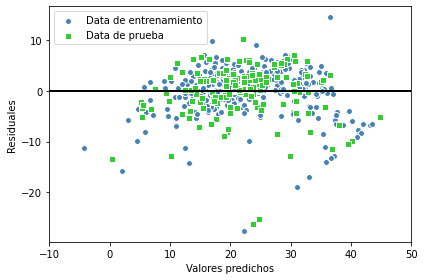

In [45]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Data de entrenamiento')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Data de prueba')
plt.xlabel('Valores predichos')
plt.ylabel('Residuales')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('images/10_09.png', dpi=300)
plt.show()

En caso de una predicción perfecta, los residuos serían exactamente cero – situación que probablemente no encontraremos nunca en aplicaciones prácticas y reales – Sin embargo, para un buen modelo de regresión, esperaríamos que los errores estuvieran distribuidos aleatoriamente y que los residuos estuvieran dispersos al azar alrededor de la línea central. Si vemos patrones en un gráfico de residuos, significa que nuestro modelo es incapaz de capturar parte de la información explicativa, la cual se ha filtrado en los residuos, como podemos ver ligeramente en nuestro gráfico de residuos anterior. Además, también podemos utilizar gráficos de residuos para detectar Outliers, representados por puntos muy desviados de la línea central.

##### Gráfica Q-Q Plot

In [48]:
residuales = y_train_pred - y_train

In [50]:
import statsmodels.api as sm
import pylab

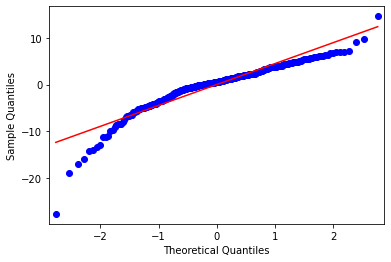

In [51]:
sm.qqplot(residuales,line='s')
pylab.show()

##### Error cuadrático medio y R^2


Otra medida cuantitativa del rendimiento de un modelo es el denominado error cuadrático medio (MSE, del inglés Mean Squared Error), que es simplemente el valor medio del coste SSE que hemos minimizado para ajustar el modelo de regresión lineal. El MSE es útil para comparar diferentes modelos de regresión o cruzada, como normaliza el SSE en el tamaño de muestra:

\begin{align*}
MSE= \frac{1}{n} \sum_{i=1}^n (y^{(i)} - \hat{y}^{(i)})^2
\end{align*}

Vamos a calcular el MSE de nuestro entrenamiento y de las predicciones de prueba:

In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196


Vemos que el MSE en el conjunto de entrenamiento es 19.96, y que el MSE del conjunto de prueba es mucho más grande – tiene un valor de 27.20 -, lo cual es un indicador de que los datos de entrenamiento de nuestro modelo tienen sobreajuste.

A veces puede resultar más útil extraer el coeficiente de determinación ( 𝑅2 ) , que puede entenderse como una versión estandarizada del MSE, para una mejor interpretación del rendimiento del modelo. En otras palabras,  𝑅2  es la fracción de la varianza de respuesta capturada por el modelo. EL valor  𝑅2  se define como:

\begin{align*}
R^2= 1 - \frac{SSE}{SST} 
\end{align*}

En este caso, el **SSE** es la suma de los errores cuadráticos y el **SST** es la suma total de los cuadrados:

\begin{align*}
SST= \frac{1}{n} \sum\nolimits_{i=1}^n (y^{(i)} - \mu_y)^2
\end{align*}

En otras palabras, el **SST** es simplemente la varianza de la respuesta.

En un momento se demostrará que **$R^2$** es, de hecho, una **versión reescalada** del **MSE**:

\begin{align*}
R^2= 1 - \frac{SSE}{SST} 
\end{align*}

\begin{align*}
R^2= 1 - \frac{\frac{1}{n} \sum_{i=1}^n (y^{(i)} - \hat{y}^{(i)})^2}{\frac{1}{n} \sum\nolimits_{i=1}^n (y^{(i)} - \mu_y)^2} 
\end{align*}

\begin{align*}
R^2= 1 - \frac{MSE}{Var(y)} 
\end{align*}

Para el conjunto de datos de entrenamiento, el $R^2$ se encuentra limitado entre 0 y 1, pero puede convertirse en negativo para el conjunto de prueba, Si $R^2 = 1$ , el modelo ajusta perfectamente los datos con el MSE = 0 correspondiente.

Una vez evaluados los datos de entrenamiento, el R2 de nuestro modelo es 0. 765, que no está nada mal. Sin embargo, el R2 del conjunto de datos de prueba es solo 0.673 lo podemos calcular ejecutando el siguiente código:

In [55]:
from sklearn.metrics import r2_score

In [56]:
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

R^2 train: 0.765, test: 0.673


In [62]:
#print('Slope w14: %.3f' % slr.coef_[13]) #coeficiente
print('Slope w13: %.3f' % slr.coef_[12]) #coeficiente
print('Slope w2: %.3f' % slr.coef_[1]) #coeficiente
print('Slope w1: %.3f' % slr.coef_[0]) #coeficiente
print('Intercept w0: %.3f' % slr.intercept_) #intercepto

Slope w13: -0.487
Slope w2: 0.044
Slope w1: -0.121
Intercept w0: 37.937
